In [1]:
import cirq_superstaq as css
import cirq

from general_superstaq import ResourceEstimate

In [2]:
# A specific version of qiskit is required. Force the version to be in the range v0.22 to v0.23.
try:
    import qiskit

    install_qiskit = not ("0.22" < qiskit.__version__ < "0.23")
except ImportError:
    install_qiskit = True

if install_qiskit:
    print("installing qiskit...")
    !pip install -q cirq-superstaq[examples]
    print("installed qiskit.")

# Getting Resource Estimate Costs

In [3]:
# Connect to SuperstaQ
# Provide your api key to the using the "api_key" argument if
# SUPERSTAQ_API_KEY environment variable is not set.
service = css.Service()

# Resource Estimate for Simple Circuit

In [4]:
# Create simple circuit and submit to simulator
q0 = cirq.LineQubit(0)
q1 = cirq.LineQubit(1)

circuit = cirq.Circuit(cirq.H(q0), cirq.CNOT(q0, q1), cirq.measure(q0))
print(circuit)

0: ───H───@───M───
          │
1: ───────X───────


In [5]:
resource_estimate = service.resource_estimate(circuit, "ss_unconstrained_simulator")
print(resource_estimate)

ResourceEstimate(num_single_qubit_gates=2, num_two_qubit_gates=1, depth=3)


# Resource Estimate for More Complex Random Circuit

In [6]:
# Create and submit random circuit to simulator
random_circuit = cirq.testing.random_circuit(
    qubits=cirq.LineQubit.range(4), n_moments=3, op_density=0.8, random_state=1234
)
print(random_circuit)

              ┌──┐
0: ───iSwap──────────────
      │
1: ───┼─────────×────T───
      │         │
2: ───┼────────T┼────────
      │         │
3: ───iSwap─────×────────
              └──┘


In [8]:
resource_estimate = service.resource_estimate(random_circuit, "ss_unconstrained_simulator")
print(resource_estimate)

ResourceEstimate(num_single_qubit_gates=2, num_two_qubit_gates=2, depth=3)


# Example on Circuit Compiled on IBMQ Device

In [9]:
qubits = cirq.LineQubit.range(2)
circuit2 = cirq.Circuit(css.AceCRPlusMinus(qubits[0], qubits[1]))
print(circuit2)

0: ───AceCR+-(Z side)───
      │
1: ───AceCR+-(X side)───


In [10]:
out = service.ibmq_compile(circuit, target="ibmq_jakarta_qpu")
print(out.circuit)

0: ───Rz(1.5π)───Rx(0.5π)───AceCR+-(Z side)───M───
                            │
1: ──────────────Rx(0.5π)───AceCR+-(X side)───────


In [11]:
resource_estimate = service.resource_estimate(circuit, "ibmq_jakarta_qpu")
print(resource_estimate)

ResourceEstimate(num_single_qubit_gates=4, num_two_qubit_gates=1, depth=4)


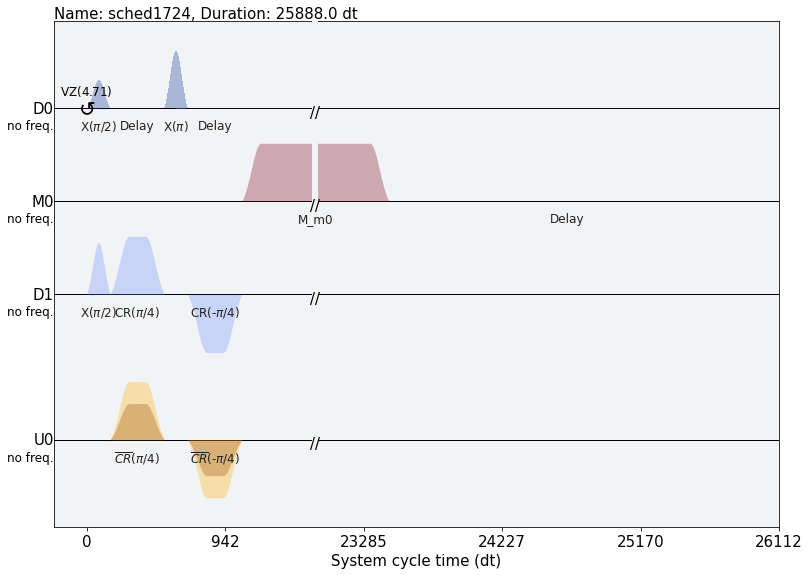

In [12]:
out.pulse_sequence.draw()

# Multiple Circuit Example

In [13]:
# Create List of random circuits (3)
qubits = cirq.LineQubit.range(3)
circuits = [
    cirq.testing.random_circuit(qubits=qubits, n_moments=2, op_density=0.8, random_state=123),
    cirq.testing.random_circuit(qubits=qubits, n_moments=2, op_density=0.8, random_state=234),
    cirq.testing.random_circuit(qubits=qubits, n_moments=2, op_density=0.8, random_state=345),
]
for c in circuits:
    print(c)

      ┌──────┐
0: ─────iSwap────────
        │
1: ────H┼────────Z───
        │
2: ─────iSwap────T───
      └──────┘
0: ───iSwap───X───
      │       │
1: ───iSwap───@───
1: ───Y───@───
          │
2: ───Y───X───


In [14]:
resource_estimates = service.resource_estimate(circuits, "ss_unconstrained_simulator")
print(resource_estimates)

[ResourceEstimate(num_single_qubit_gates=3, num_two_qubit_gates=1, depth=2), ResourceEstimate(num_single_qubit_gates=0, num_two_qubit_gates=2, depth=2), ResourceEstimate(num_single_qubit_gates=2, num_two_qubit_gates=1, depth=2)]
